# Titanic Prediction
There are 3 files in the data:
1. train.csv
2. test.csv
3. gender_submission.csv

### train.csv
train.csv contains the details of a subset of the passengers on board (891 passengers, to be exact)
The values of "Survived":
- if it's a "1" = survived
- if it's a "0" = died

### test.csv
Using the patterns that you find in train.csv, you have to predict whether the other 418 passengers on board in test.csv survived.

### gender_submission.csv
provide as an example that shows how you should structure your predictions. It predicts that all female passengers survived, and all male passengers died. Your hypohoteses regarding survival will probably be different.

In [1]:
# import all libraries
import pandas as pd 
import seaborn  as sns
import numpy as np 
import matplotlib.pyplot as plt 

In [9]:
# load the data train
titanic_train = pd.read_csv('train.csv')
titanic_train.head() #to read 5 top of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The meaning of the attributes:
- Survived: target variable, whether the passenger survived (1) or not (0)
- Pclass: passenger class, 1 = first class, 2 = middle class, 3 = lower class
- Name, sex, age: personal information about the passengers
- SibSp: how many siblings or spouses the passenger aboard in Titanic
- Parch: how many children or parents or the passenger aboard in Titanic
- Ticket: ticket ID
- Fare: Price paid
- Cabin: Passenger's cabin number
- Embarked: where the passenger embarked the Titanic

In [11]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


there are some missing values, lets check that out on data preprocessing

In [14]:
titanic_train.shape
# 891 rows and 12 columns

(891, 12)

In [12]:
# checking the 'null' or missing data
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

it means that:
1. 177 datas of 'Age' is null (no data)
2. 687 datas of 'Cabin' is null (no data)
3. 2 data of 'Embarked' is null (no data)

In [15]:
titanic_train.loc[titanic_train.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


There are no duplicate data

<Axes: >

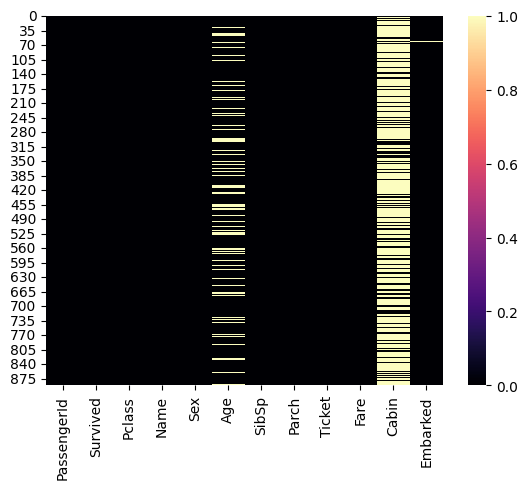

In [16]:
sns.heatmap(titanic_train.isnull(), cmap="magma")

There are too many missing value in 'Cabin' column, but less in 'Age'. We can drop the 'Cabin'

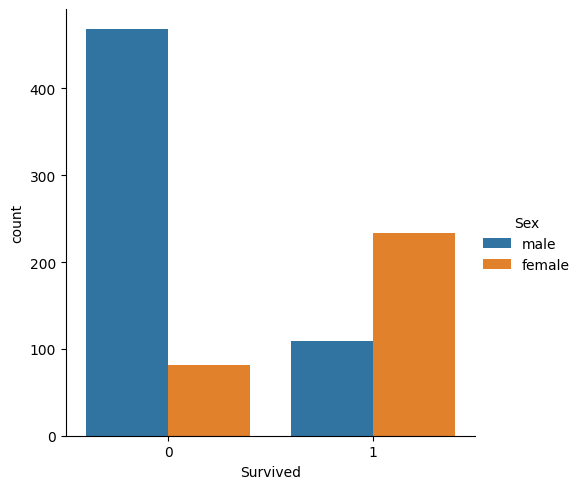

In [17]:
sns.catplot(x='Survived', data=titanic_train, kind='count', hue='Sex')

Female survived more than male

In [21]:
titanic_train.groupby(titanic_train['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

around 75% of women survived while only 19% male are survived. Means that 'Genders' seems to have a stong indicator of survival.

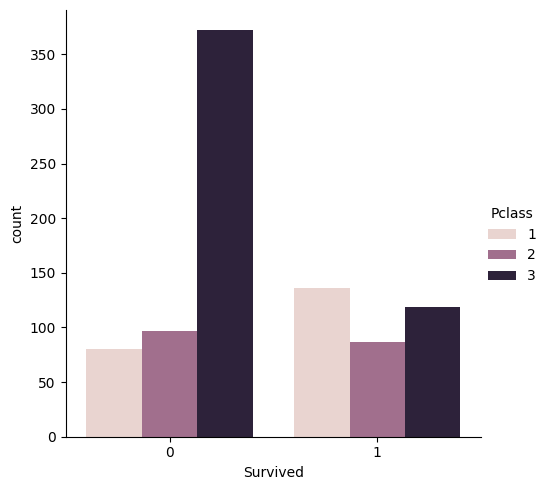

In [22]:
sns.catplot(x='Survived', data=titanic_train, kind='count', hue='Pclass')

3rd class passengers died the most. There are strong relationship between Pclass, Genders, and the survivals. Next, we need to explore more based on 3 of that.

In [75]:
%pip install Jinja2
pd.crosstab([titanic_train.Sex, titanic_train.Survived], titanic_train.Pclass).style.background_gradient(cmap='viridis')

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: xlabel='Survived', ylabel='Fare'>

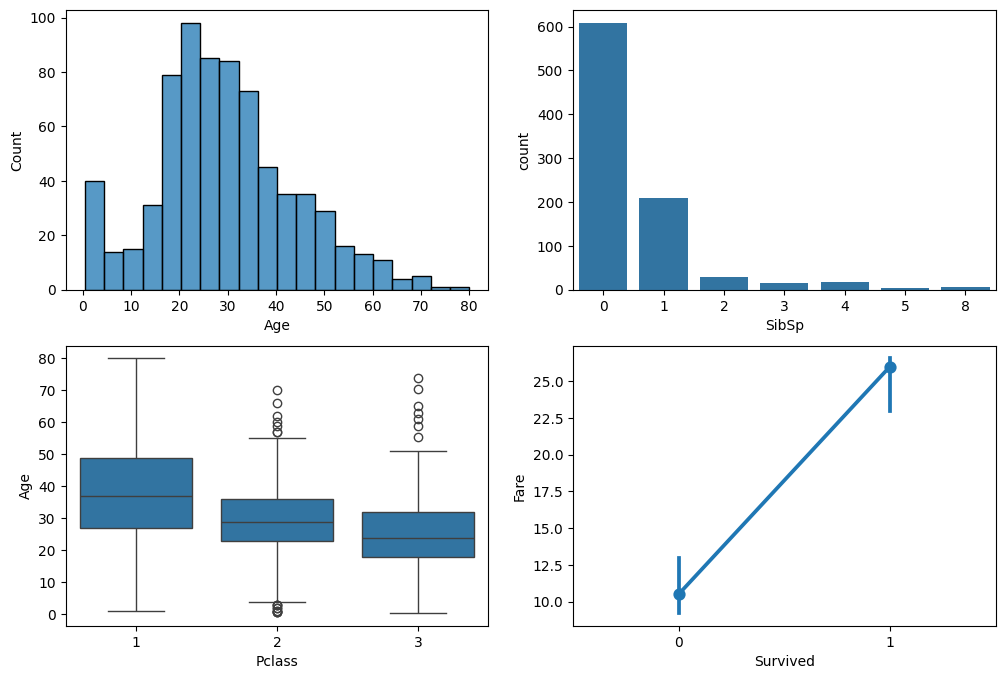

In [27]:
fig, axes = plt.subplots(2,2, figsize=(12,8))
sns.histplot(x='Age', data=titanic_train, ax=axes[0,0])
sns.countplot(x="SibSp",data=titanic_train, ax=axes[0,1])
sns.boxplot(x='Pclass',y='Age', data=titanic_train,ax=axes[1,0])
sns.pointplot(x='Survived', y='Fare', data=titanic_train, ax=axes[1,1], estimator='median')

take a look at the figures:
1. most of passengers died at age 25-35
2. Those who hadn't any siblings died the most
3. 1st, 2nd, 3rd class passengers have age median of 37, 30, 27
4. Those who paid more for the tickets, they survived the most but 95% confidence level is not so stable for those who survived

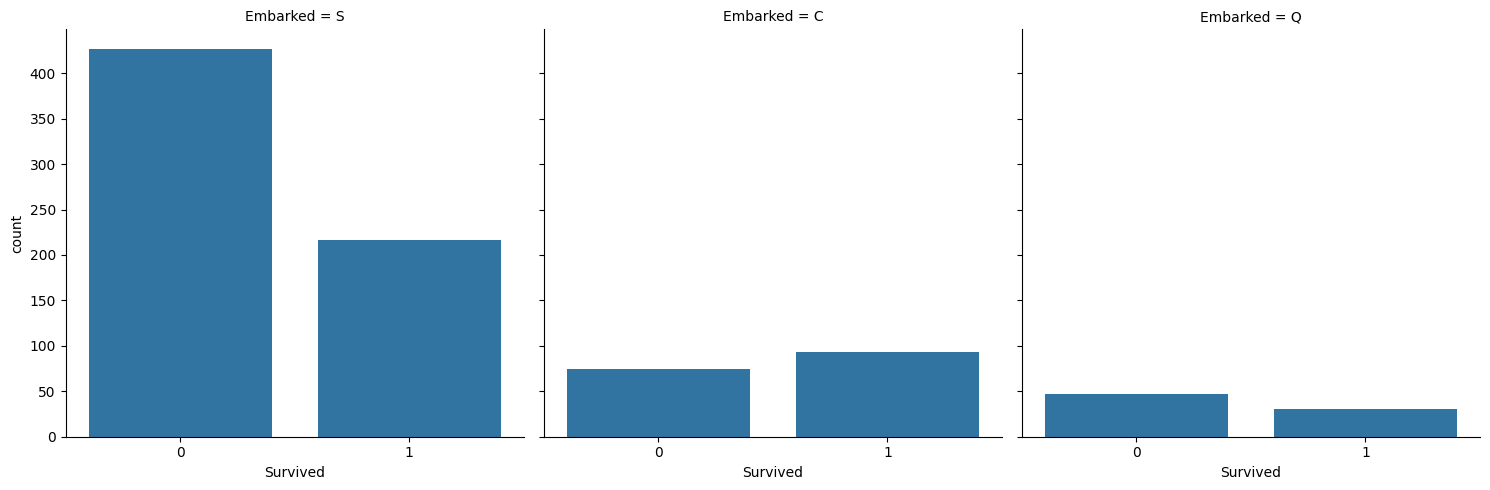

In [31]:
sns.catplot(x='Survived', col='Embarked', data=titanic_train, kind='count')

Passengers from Southampton were less likely to survived while passengers from Cherbourg is likely to survived

In [32]:
titanic_train.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


<Axes: xlabel='Age', ylabel='Fare'>

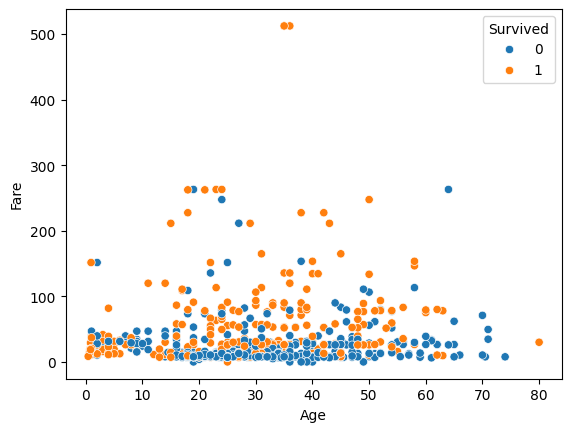

In [33]:
sns.scatterplot(x='Age', y='Fare', data=titanic_train, hue='Survived')

There are 2 assumption based on this. Those who survived are:
1. paid a bit higher
2. young (a children)

# Data Preprocessing
we prepare the data before proceed it. The major steps are:
1. Data Cleaning (locates and fixes errors or discrepancies in the data, from duplicates to missing data)
1. Data Integration (integrates/merges information extracted from multiple sources to outline and create a single dataset)
3. Data Transformation (Normalization, standardization, and discretisation are common data transformation procedures.)
4. Data Reduction (process of lowering the dataset’s size while maintaining crucial information.)

In [40]:
def age_range(position):
    if pd.isnull(position[0]):
        if position[1]==3:
            return 27
        elif position[1]==2:
            return 30
        else:
            return 37
        
    else:
        return position[0]

In [41]:
titanic_train["Age"]=titanic_train[['Age','Pclass']].apply(age_range, axis=1)
titanic_test['Age']=titanic_test[['Age','Pclass']].apply(age_range, axis=1)

C:\Users\Belle\AppData\Local\Temp\ipykernel_17444\4223671845.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pd.isnull(position[0]):
C:\Users\Belle\AppData\Local\Temp\ipykernel_17444\4223671845.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return position[0]
C:\Users\Belle\AppData\Local\Temp\ipykernel_17444\4223671845.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if position[1]==3:
C:\Users\Belle\AppData\Local\Te

<Axes: >

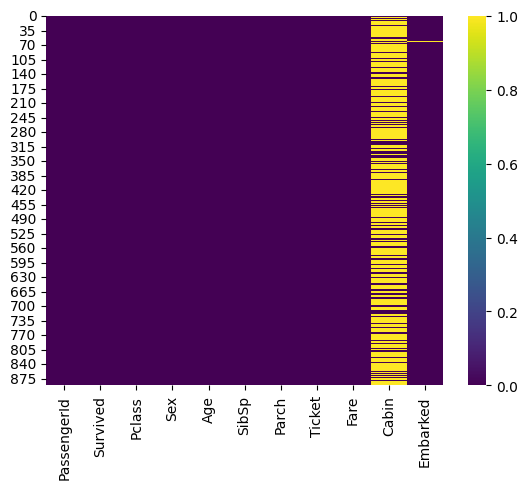

In [42]:
sns.heatmap(titanic_train.isnull(),cmap='viridis')

In [43]:
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test['Fare'].mean())

# Data Wrangling

In [70]:
from sklearn.ensemble import RandomForestClassifier

y = titanic_train["Survived"]

features = ["Pclass","Sex","SibSp","Parch"]
X = pd.get_dummies(titanic_train[features])
X_test = pd.get_dummies(titanic_test[features])

model = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=1)
model.fit(X,y)
predictions = model.predict(X_test)

outputpsid = pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Survived':predictions})
outputpsid

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [69]:
outputsex = pd.DataFrame({'Sex': titanic_test.Sex, 'Survived':predictions})
outputsex

,Sex,Survived
0,male,0
1,female,1
2,male,0
3,male,0
4,female,1
...,...,...
413,male,0
414,female,1
415,male,0
416,male,0


In [72]:
outputname = pd.DataFrame({'Name': titanic_test.Name, 'Survived':predictions})
outputname

,Name,Survived
0,"Kelly, Mr. James",0
1,"Wilkes, Mrs. James (Ellen Needs)",1
2,"Myles, Mr. Thomas Francis",0
3,"Wirz, Mr. Albert",0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1
...,...,...
413,"Spector, Mr. Woolf",0
414,"Oliva y Ocana, Dona. Fermina",1
415,"Saether, Mr. Simon Sivertsen",0
416,"Ware, Mr. Frederick",0


In [74]:
outputname.to_csv('Titanic_survivors.csv', index=False)
print("The file successfully saved!")

The file successfully saved!
